# One-Legged Hopper

In this set, we're going to spend some time with the [one-legged hopper](http://www.ai.mit.edu/projects/leglab/robots/3D_hopper/3D_hopper.html). This system (which is discussed in great detail in [this paper](http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6313238) -- you can reference that paper for some parts of this set!) enables extremely dynamic walking behavior that bounces between *stance phases* when the foot is on the ground, and *flight phases* when the foot is in the air. The system is dramatically underactuated in both phases, but as you'll see in this problem set, it can still be stabilized!

## Dynamics
The (planar) one-legged hopper consists of a body with mass $m_b$ and a foot with a mass $m_f$, with the connection between the foot and the body being a single (actuated, torque-controlled) pin joint, and the leg being springy with controllable spring constant.

<p align="center">
  <img src="./planar_hopper.png" width="350"/>
</p>

The planar one-legged hopper, diagramed above, has state

$$ \mathbb{x} = \left[ \begin{array} \\ q \\ \dot q \end{array}\right] \ \ \ q = \left[\begin{array}\\ x \\ z \\ \theta \\ \alpha \\ l\end{array}\right] $$

for floating base coordinates $x, z, \theta$, hip angle $\alpha$, and leg extension $l$ limited to $\left[-\infty, l_{max}\right]$. This joint limit is implemented with a highly damped one-sided (i.e., only active when the limit is exceeded) spring. The "springiness" in the leg is represented by a force $f_{spring} = K_l * (l_{rest} - l)$ that pushes the foot back to full extension when it is compressed. **The system has two control inputs: instantaneous control of $l_{rest}$, and direct torque control of the leg angle.**

This system is hybrid due to the joint limit and ground contact, and (usually) oscillates between two contact modes:

1) **Flight**: When the foot is not in contact with the ground and the leg is fulled extended to $l = l_{max}$ (these usually occur simultaneously, as in flight there's nothing stopping the leg from passively extending). In this mode, the whole assembly flies through the air under the influence of gravity.

2) **Stance**: When the foot is in contact with the ground, a ground reaction force (also represented with a highly damped one-sided spring) pushes the foot out of collision with the ground.

## Controlling the Hopper

As discussed in lecture, one might think about controlling this system by separating it into three separate control problems:

1) Controlling the hopping height of the body by pushing off the ground while in stance phase

2) Controlling the horizontal velocity of the body by choosing where to place the foot during the next stance phase (which requires exerting torque during flight phase to aim the leg)

3) Controlling the angular velocity of the body by applying a torque to the leg while in stance phase

In this section we'll play with a planar model of the 1D hopper. **We've supplied a controller that will take care of regulating the hopping height (using Raibert's very simple controller) by modifying the spring rest length.**


## What you have to do

Peruse the provided 1d hopper controller class in *hopper_2d.py* and understand what it is currently accomplishing. The *Hopper2dController* system implements a controller for the planar 2d hopper, and the *Simulate2dHopper* function loads in the 2d hopper from a robot description file, hooks up the controller, and runs a simulation. The controller calculates its output in *_DoCalcVectorOutput*, but dispatches its decision making to two other methods: 

- *ChooseSpringRestLength* picks the instantaneous rest length of the spring. We've written this for you, implementing something like Raibert's original hopper height controller.
- *ChooseThighTorque* picks a leg angle torque (which directly controls $\ddot \alpha$). You have to write this one!

**Fill in ChooseThighTorque with a leg angle torque controller that lateral velocity to the desired lateral velocity, and also keeps the body steady ($\theta = 0$).** Comment your code thoroughly explaining what your controller is doing -- we reserve the right to dock points for functional but seemingly arbitrary code! The code snippets below are here to help you test your system (feel free to change the initial condition, the simulation duration, the lateral velocity target, the xlim and ylim of the visualizer, etc...). As usual, a battery of tests will be used to help validate your system -- feel free to peruse (but don't modify) *test_set_4.py* to see the conditions we're testing.

### Advice:
- While you're very welcome to explore (any method that passes the tests is technically OK!), I recommend implementing one of the three controllers described in Section IV of [this paper](http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6313238&tag=1). In particular, the 3rd controller ("Servo Attitude") we found to be particularly effective and simple to implement. Like many "intuitive"-style controllers, it has a handful of parameters that must be estimated (e.g. the typical duration of flight and stance phases), which you are free to infer from looking at simulation runs and hard-coding.
- Gain tuning will undoubtedly be a stumbling block here. Start as simple as you can: for example, focus first on controlling lateral velocity to 0 (i.e. just maintain balance), then controlling lateral velocity to reasonable speeds, and then finally controlling the body angle to near zero. Only try to tune one number at a time!
- Friction with the ground is *not infinite*, so if you see the foot slipping, fix your foot placement or limit your leg angle torques.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


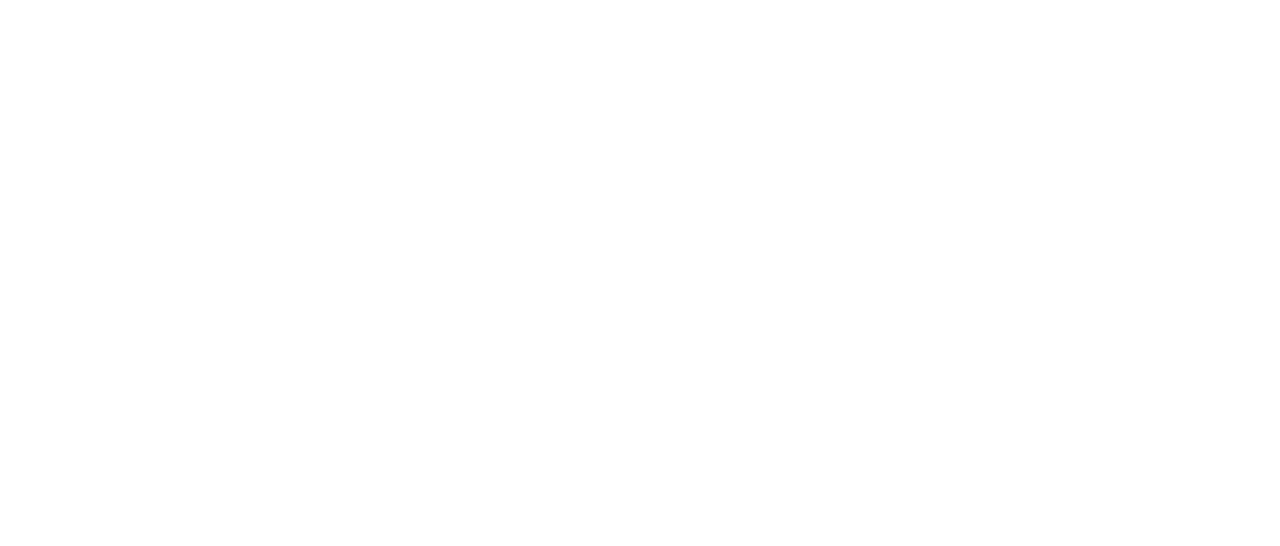

t:  0.0
[0.         1.51203984 0.         0.         0.5        0.
 6.26299012 0.         0.         6.26299012]
[0.20446082 1.49366169 0.         0.1498539  0.5        1.23279597
 6.15696936 0.         0.20021039 6.27201622]
[-0.21911393  1.49138446  0.         -0.16066668  0.5        -1.32086732
  6.14167284  0.         -0.21456906  6.27388083]
[0.62829603 1.34366903 0.         0.47826471 0.5        3.76929449
 5.22181664 0.         0.62911899 6.37067964]
[-1.10999741  0.85392964  0.         -0.97460722  0.5        -6.55670154
  2.23475403  0.         -1.22181934  6.68034764]
[-0.70094712 -1.49155552  0.          3.12024462  0.5        -4.64939585
 -7.54188722  0.          3.21011985  7.44092081]
[-0.13634107 -1.42457536  0.          2.83876896  0.5        -1.72129174
 -8.62588822  0.          2.8119172   7.72007721]
[ 0.02891703 -1.37811162  0.          2.74818107  0.5        -0.79397338
 -8.72525701  0.          2.72044203  7.75434225]
[ 0.06190593 -1.36469929  0.          2.728894

self.current_desired_l_at_bottom: 	1.0
self.current_desired_touchdown_beta: 	0.1
t:  2.0
touchdown_beta: 			0.08757667529736468
[ 0.2252957   0.96108907  0.34358038  0.54128591  0.5         4.60852146
 -0.64706843  0.          2.27981751  3.15636497]
[ 2.84397951 -1.01601021  0.34358038  1.97808357  0.5         4.60592806
 -6.2362246   0.          0.9445229   7.6221908 ]
[ 2.9604842  -1.17855083  0.34358038  2.13847163  0.5         4.60716599
 -6.48376404  0.          0.22135282  7.94700769]
[ 3.04911505 -1.30645806  0.34358038  2.29324012  0.5         4.60860092
 -6.67161901  0.         -0.53825953  8.06832232]
[ 3.11287774 -1.4007506   0.34358038  2.44404397  0.5         4.61012167
 -6.80625766  0.         -1.3100741   7.98227432]
[ 3.1536855  -1.46209563  0.34358038  2.59216533  0.5         4.61161336
 -6.89181663  0.         -2.0703948   7.68891484]
[ 3.17270237 -1.49094904  0.34358038  2.73866564  0.5         4.61296078
 -6.93083389  0.         -2.79583963  7.19223521]
[ 3.1705234

liftoff_beta: 				0.6392001306704794
liftoff_beta: 				0.6391999356672796
liftoff_beta: 				0.639199934982653
liftoff_beta: 				0.639199697349059
liftoff_beta: 				0.6391995251345776
liftoff_beta: 				0.6391995397579597
liftoff_beta: 				0.6391993252133649
liftoff_beta: 				0.6391993170332195
liftoff_beta: 				0.6391990689304783
liftoff_beta: 				0.6391988872090525
liftoff_beta: 				0.639198896060265
liftoff_beta: 				0.6391986736784758
liftoff_beta: 				0.639198660837692
liftoff_beta: 				0.6391984065679491
liftoff_beta: 				0.6391982196737651
liftoff_beta: 				0.6391982256448563
liftoff_beta: 				0.6391979997603942
liftoff_beta: 				0.6391979851426314
liftoff_beta: 				0.6391977290155471
liftoff_beta: 				0.639197541231779
liftoff_beta: 				0.6391975471589082
liftoff_beta: 				0.6391973219913295
liftoff_beta: 				0.6391973083825521
liftoff_beta: 				0.6391970545311837
liftoff_beta: 				0.6391968699288321
liftoff_beta: 				0.6391968784867598
liftoff_beta: 				0.6391966579855274
liftof

liftoff_beta: 				0.6391538764286164
liftoff_beta: 				0.6391536888938765
liftoff_beta: 				0.6391537397993212
liftoff_beta: 				0.6391537660702525
liftoff_beta: 				0.6391537615966246
liftoff_beta: 				0.6391537357297395
liftoff_beta: 				0.6391536829497194
liftoff_beta: 				0.6391534541871144
liftoff_beta: 				0.6391534783493885
liftoff_beta: 				0.6391534785257679
liftoff_beta: 				0.6391534486043247
liftoff_beta: 				0.6391532543694602
liftoff_beta: 				0.6391533016143995
liftoff_beta: 				0.6391533248739946
liftoff_beta: 				0.6391533180105708
liftoff_beta: 				0.6391532903844425
liftoff_beta: 				0.6391532364610543
liftoff_beta: 				0.6391530071029576
liftoff_beta: 				0.6391530316434118
liftoff_beta: 				0.6391530328180528
liftoff_beta: 				0.6391530044841878
liftoff_beta: 				0.6391528137004253
liftoff_beta: 				0.6391528639831989
liftoff_beta: 				0.6391528908674261
liftoff_beta: 				0.6391528881833286
liftoff_beta: 				0.6391528652943289
liftoff_beta: 				0.639152816646134
li

liftoff_beta: 				0.6391505101082454
liftoff_beta: 				0.6391505771191778
liftoff_beta: 				0.6391506424246012
liftoff_beta: 				0.6391507122691963
liftoff_beta: 				0.6391507803604412
liftoff_beta: 				0.6391508529402986
liftoff_beta: 				0.6391509237147525
liftoff_beta: 				0.6391509989230852
liftoff_beta: 				0.6391510722700163
liftoff_beta: 				0.6391511499921977
liftoff_beta: 				0.6391512257933148
liftoff_beta: 				0.6391513059074458
liftoff_beta: 				0.6391513840374742
liftoff_beta: 				0.639151466414968
liftoff_beta: 				0.6391515467422405
liftoff_beta: 				0.6391516312484232
liftoff_beta: 				0.6391517136354862
liftoff_beta: 				0.6391518001302053
liftoff_beta: 				0.6391518844344327
liftoff_beta: 				0.639151972772678
liftoff_beta: 				0.6391520588468967
liftoff_beta: 				0.6391521488794272
liftoff_beta: 				0.639152236572545
liftoff_beta: 				0.6391523281465192
liftoff_beta: 				0.639152417304158
liftoff_beta: 				0.6391525102637676
liftoff_beta: 				0.6391526007288966
lifto

liftoff_beta: 				0.639201127308254
liftoff_beta: 				0.6392011822338192
liftoff_beta: 				0.6392012402673228
liftoff_beta: 				0.6392012951737759
liftoff_beta: 				0.639201353186693
liftoff_beta: 				0.6392014080711592
liftoff_beta: 				0.6392014660606812
liftoff_beta: 				0.6392015209204199
liftoff_beta: 				0.6392015788838765
liftoff_beta: 				0.6392016337162878
liftoff_beta: 				0.6392016916511531
liftoff_beta: 				0.6392017464537865
liftoff_beta: 				0.639201804357687
liftoff_beta: 				0.6392018591282462
liftoff_beta: 				0.6392019169989666
liftoff_beta: 				0.6392019717353173
liftoff_beta: 				0.639202029570806
liftoff_beta: 				0.6392020842709788
liftoff_beta: 				0.6392021420693512
liftoff_beta: 				0.6392021967315469
liftoff_beta: 				0.6392022544910918
liftoff_beta: 				0.6392023091136855
liftoff_beta: 				0.6392023668328662
liftoff_beta: 				0.6392024214144086
liftoff_beta: 				0.6392024790918659
liftoff_beta: 				0.6392025336310879
liftoff_beta: 				0.6392025912656436
lifto

liftoff_beta: 				0.639238047377711
liftoff_beta: 				0.6392381014292514
liftoff_beta: 				0.6392381585947773
liftoff_beta: 				0.6392382126436844
liftoff_beta: 				0.639238269806588
liftoff_beta: 				0.6392383238528982
liftoff_beta: 				0.6392383810132213
liftoff_beta: 				0.6392384350569793
liftoff_beta: 				0.6392384922147707
liftoff_beta: 				0.6392385462560313
liftoff_beta: 				0.6392386034113499
liftoff_beta: 				0.6392386574501752
liftoff_beta: 				0.6392387146030871
liftoff_beta: 				0.6392387686395478
liftoff_beta: 				0.6392388257901278
liftoff_beta: 				0.6392388798243013
liftoff_beta: 				0.6392389369726308
liftoff_beta: 				0.6392389910046027
liftoff_beta: 				0.6392390481507708
liftoff_beta: 				0.6392391021806325
liftoff_beta: 				0.6392391593247339
liftoff_beta: 				0.6392392133525843
liftoff_beta: 				0.6392392704947196
liftoff_beta: 				0.6392393245206625
liftoff_beta: 				0.6392393816609391
liftoff_beta: 				0.639239435685083
liftoff_beta: 				0.6392394928236123
lift

liftoff_beta: 				0.6392843646558029
liftoff_beta: 				0.639284421821819
liftoff_beta: 				0.6392844758747979
liftoff_beta: 				0.6392845330407673
liftoff_beta: 				0.6392845870937051
liftoff_beta: 				0.6392846442596286
liftoff_beta: 				0.6392846983125265
liftoff_beta: 				0.6392847554784055
liftoff_beta: 				0.6392848095312655
liftoff_beta: 				0.6392848666971014
liftoff_beta: 				0.6392849207499246
liftoff_beta: 				0.6392849779157194
liftoff_beta: 				0.6392850319685078
liftoff_beta: 				0.639285089134263
liftoff_beta: 				0.6392851431870186
liftoff_beta: 				0.6392852003527367
liftoff_beta: 				0.6392852544054615
liftoff_beta: 				0.6392853115711442
liftoff_beta: 				0.6392853656238403
liftoff_beta: 				0.6392854227894901
liftoff_beta: 				0.6392854768421601
liftoff_beta: 				0.6392855340077794
liftoff_beta: 				0.6392855880604259
liftoff_beta: 				0.6392856452260177
liftoff_beta: 				0.6392856992786429
liftoff_beta: 				0.6392857564442094
liftoff_beta: 				0.6392858104968163
lif

In [50]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import hopper_2d
import numpy as np
import matplotlib.pyplot as plt
import math

# x0 = np.zeros(10)
# x0[1] = 1.5
# x0[4] = 0.5
# x0[5] = 0.1

lift_off_plus_state = np.zeros(10)
lift_off_plus_state[1] = 3.5  # height
# lift_off_plus_state[2] = -0.1
# lift_off_plus_state[2] = -0.1  # alpha
# lift_off_plus_state[3] = -0.3  # alpha
lift_off_plus_state[4] = 0.5  # l distance
# lift_off_plus_state[0+5] = 1.0  # xd
hopper, controller, state_log, animation = hopper_2d.Simulate2dHopper(x0 = lift_off_plus_state,
                           
                                                                      duration=8.0,
                               desired_lateral_velocity = 0.5,
#                                                                       actuators_off=True,
                               print_period = 1.0)
print('Done')

In [ ]:
from IPython.display import HTML
HTML(animation.to_jshtml())

<IPython.core.display.Javascript object>


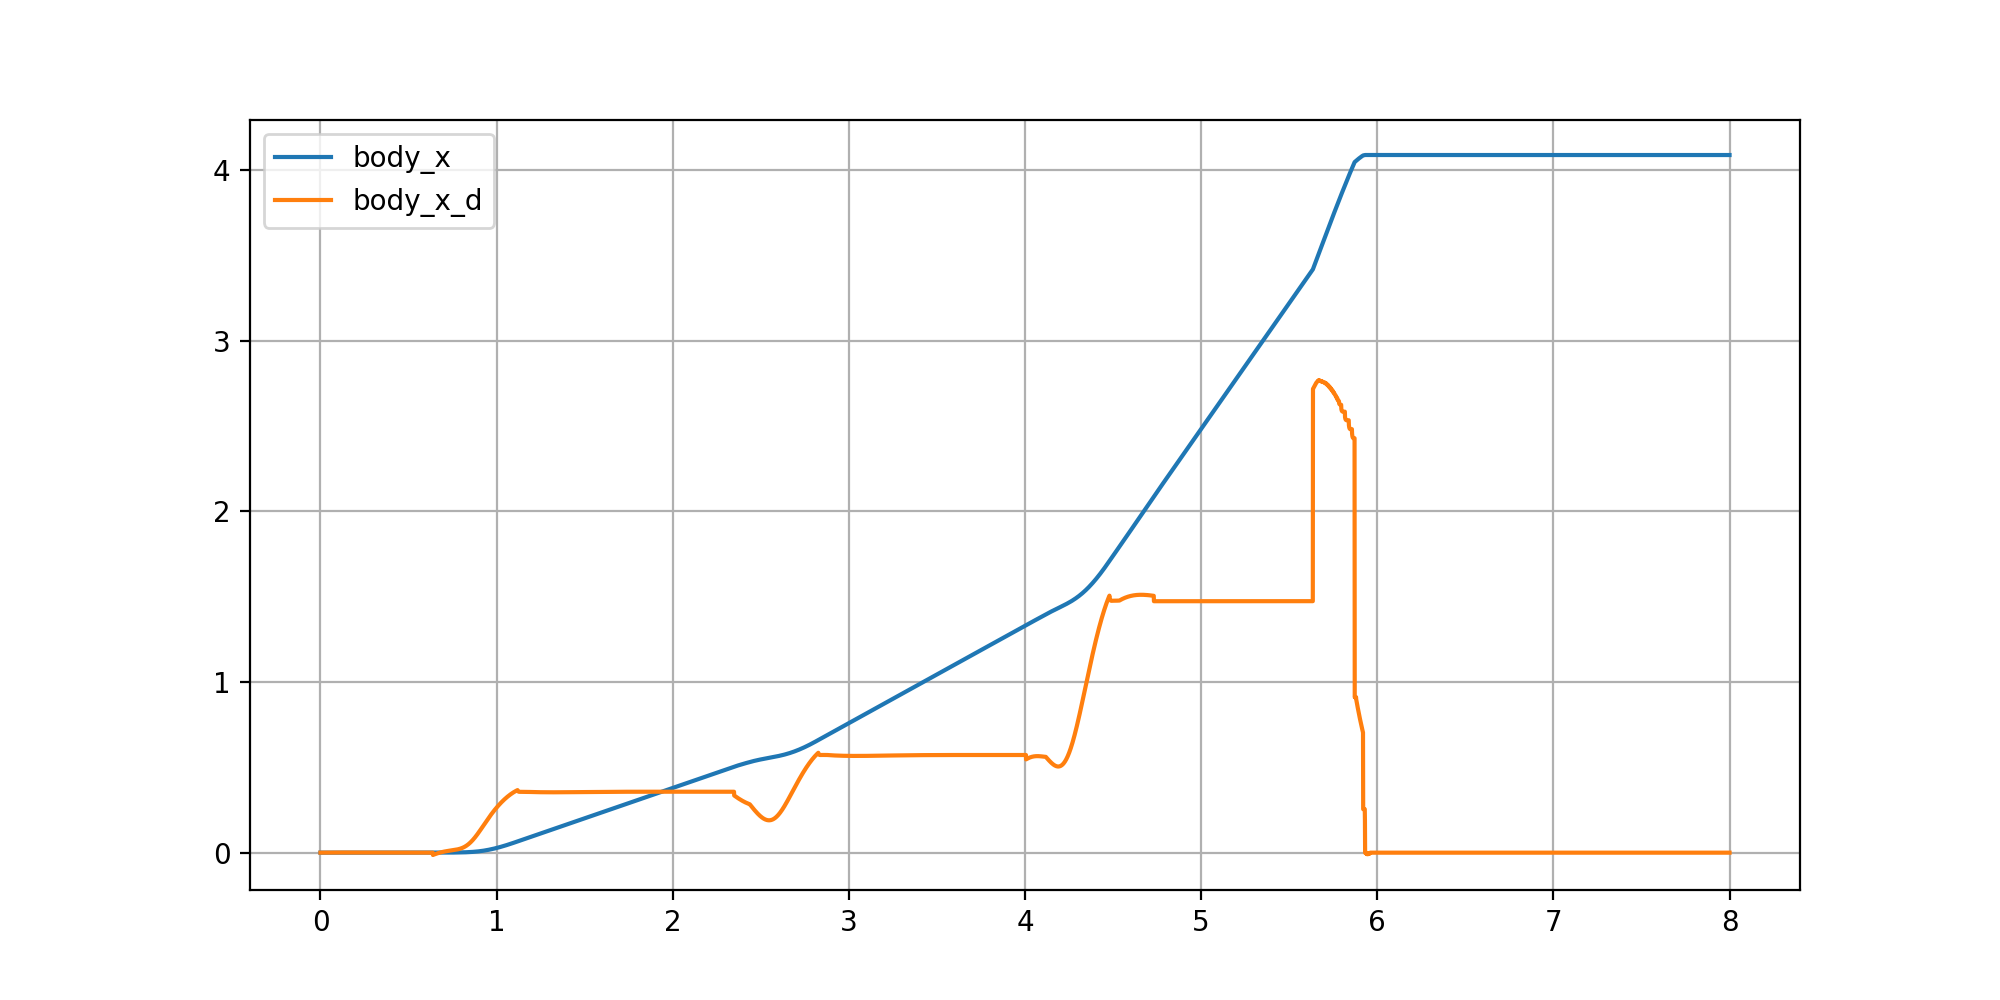

<IPython.core.display.Javascript object>


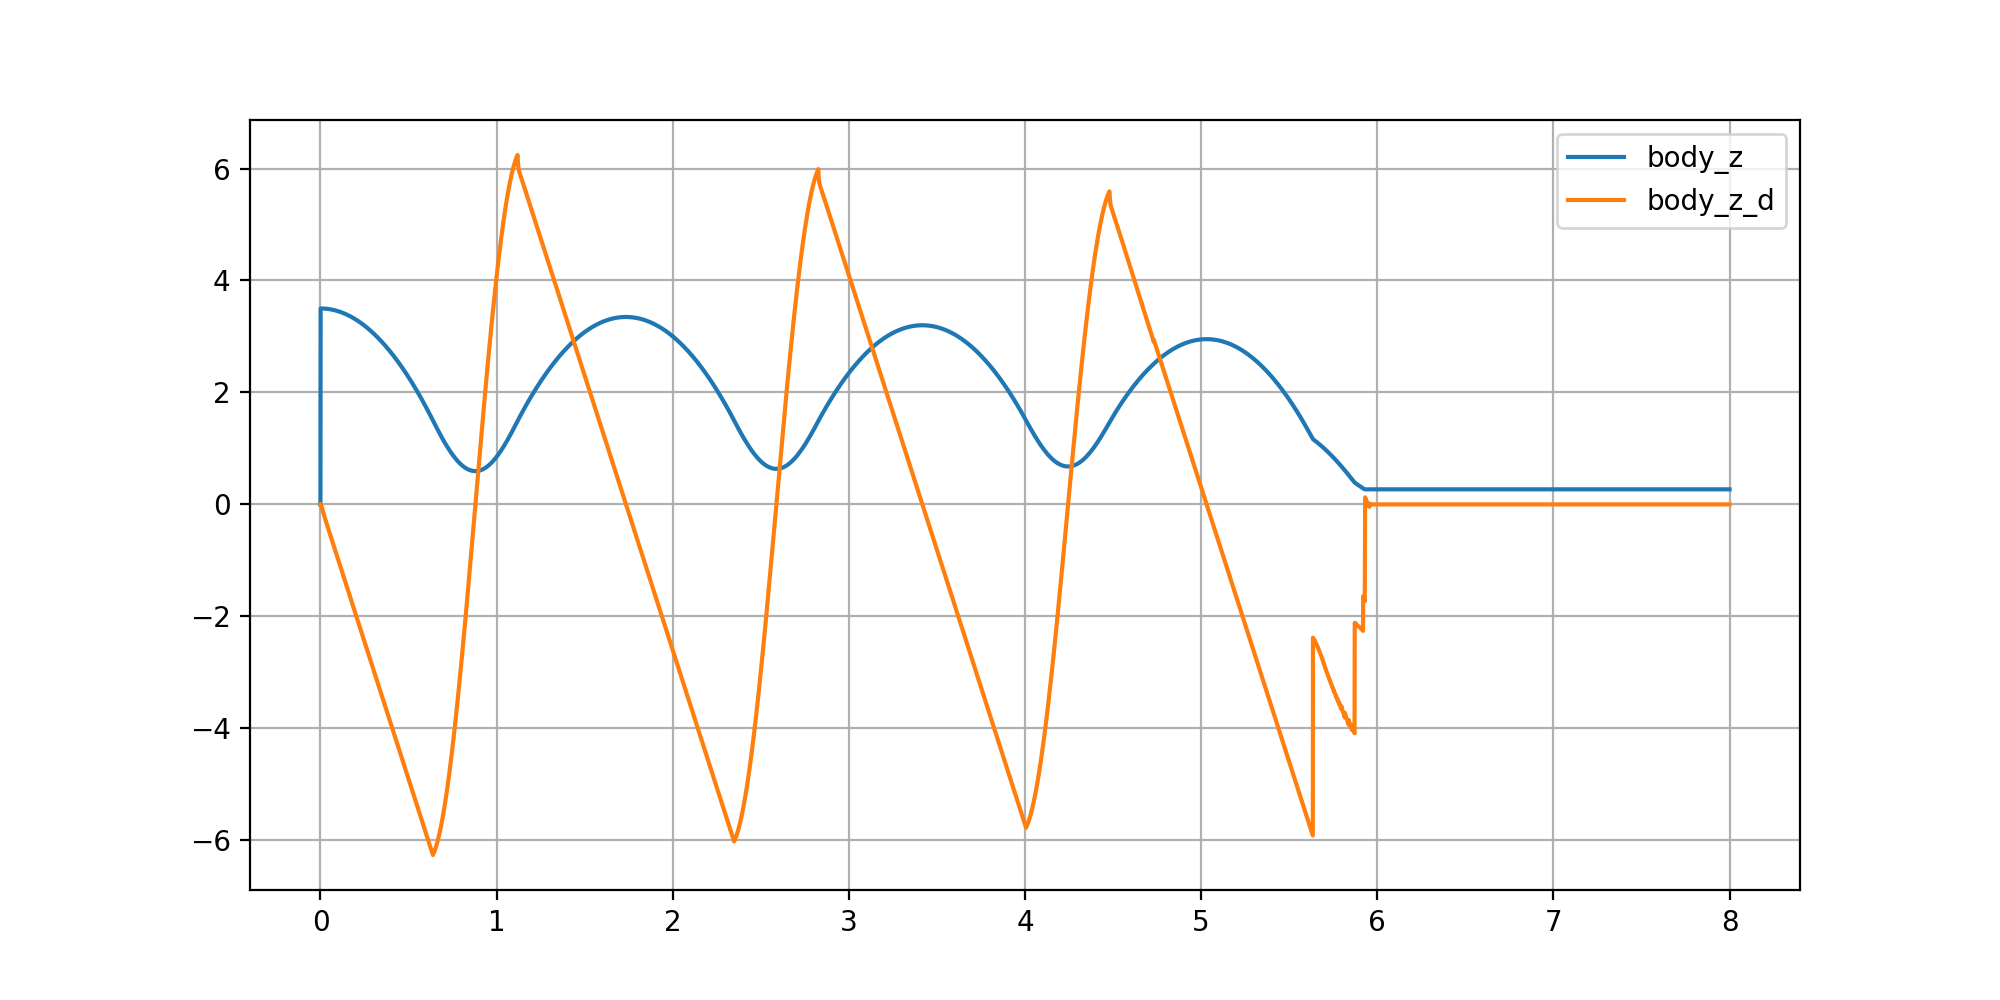

<IPython.core.display.Javascript object>


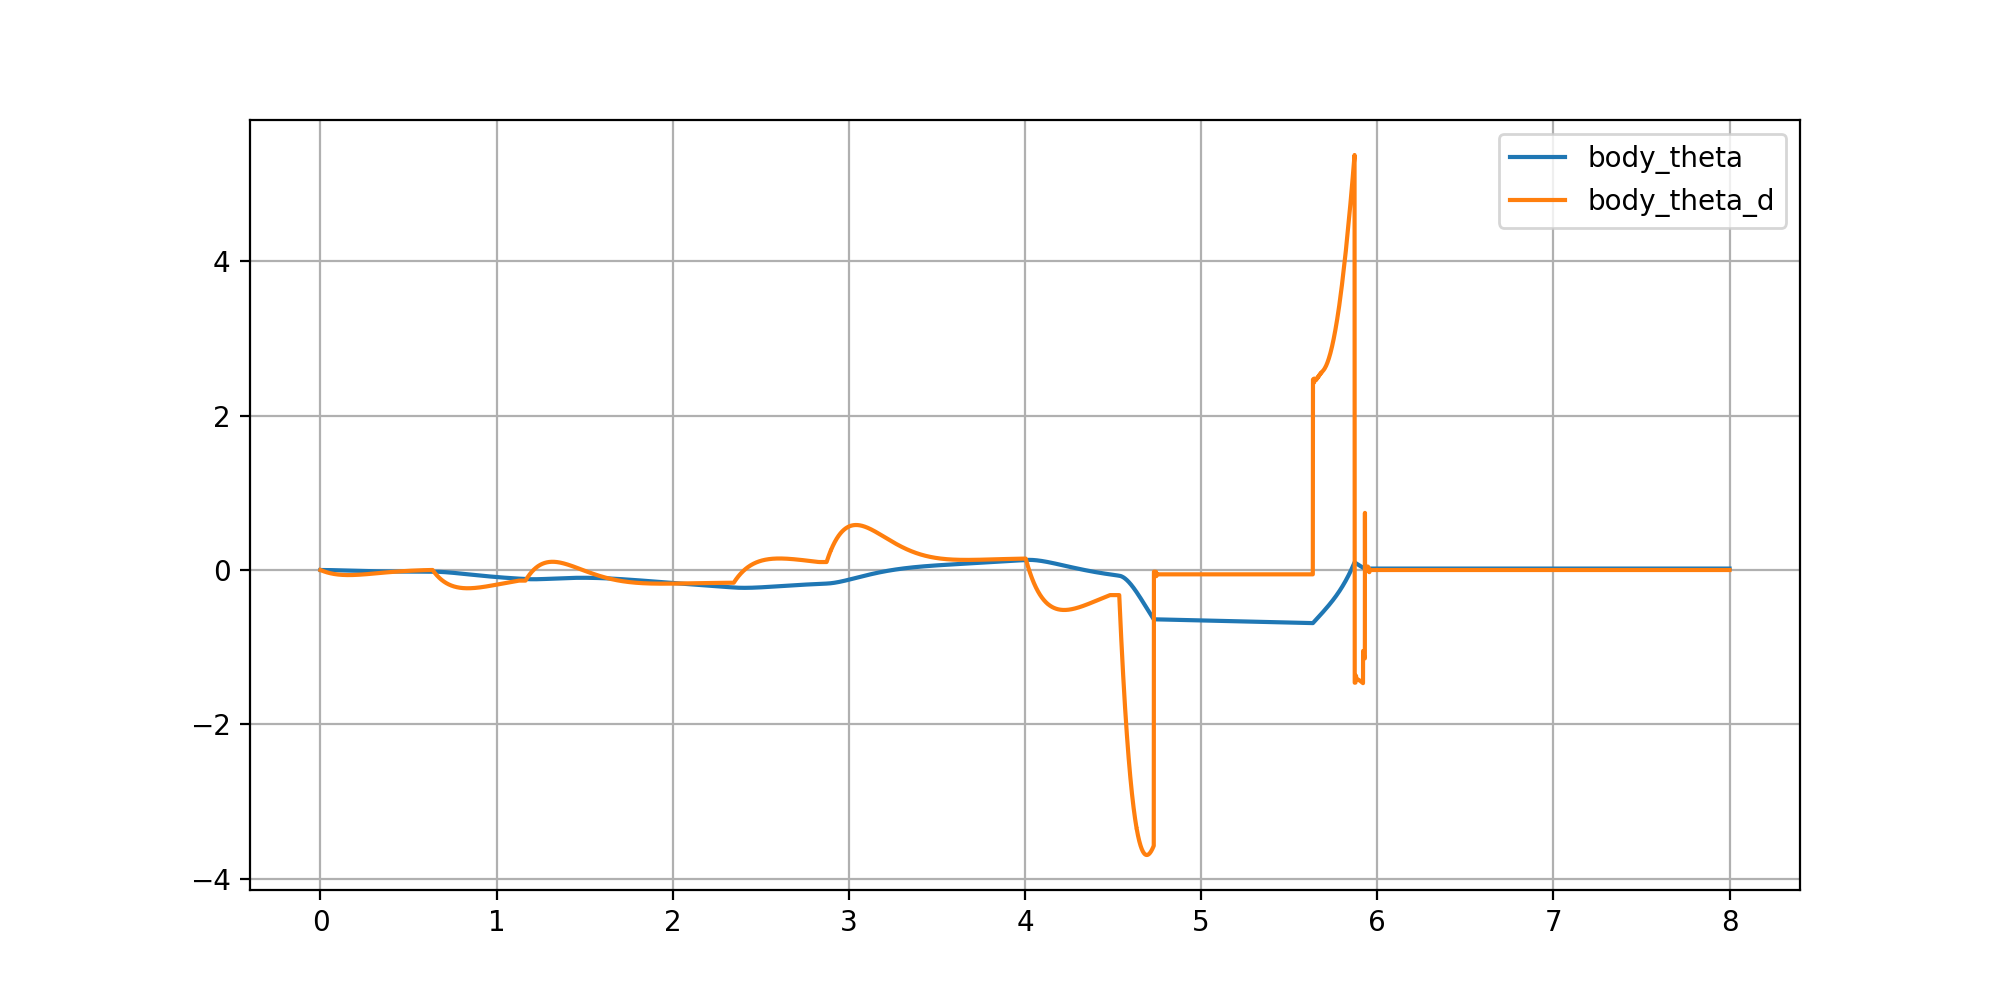

<IPython.core.display.Javascript object>


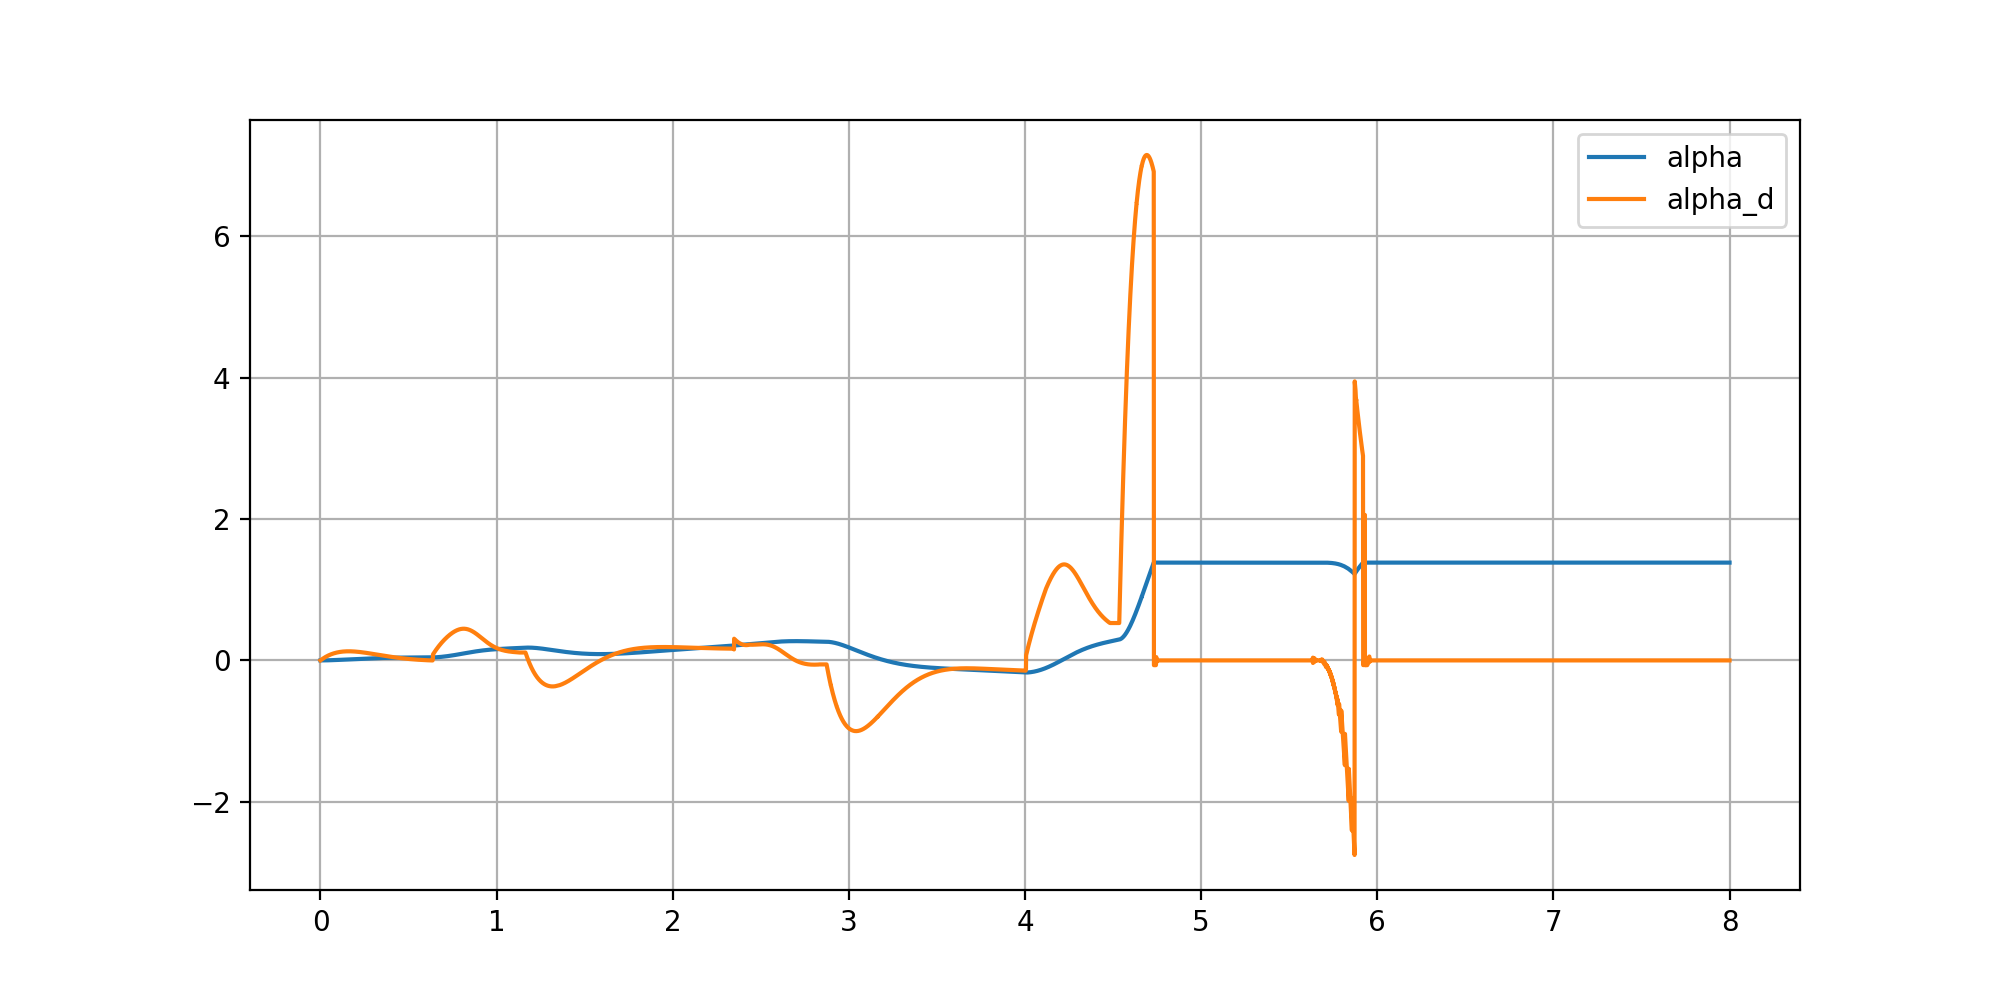

<IPython.core.display.Javascript object>


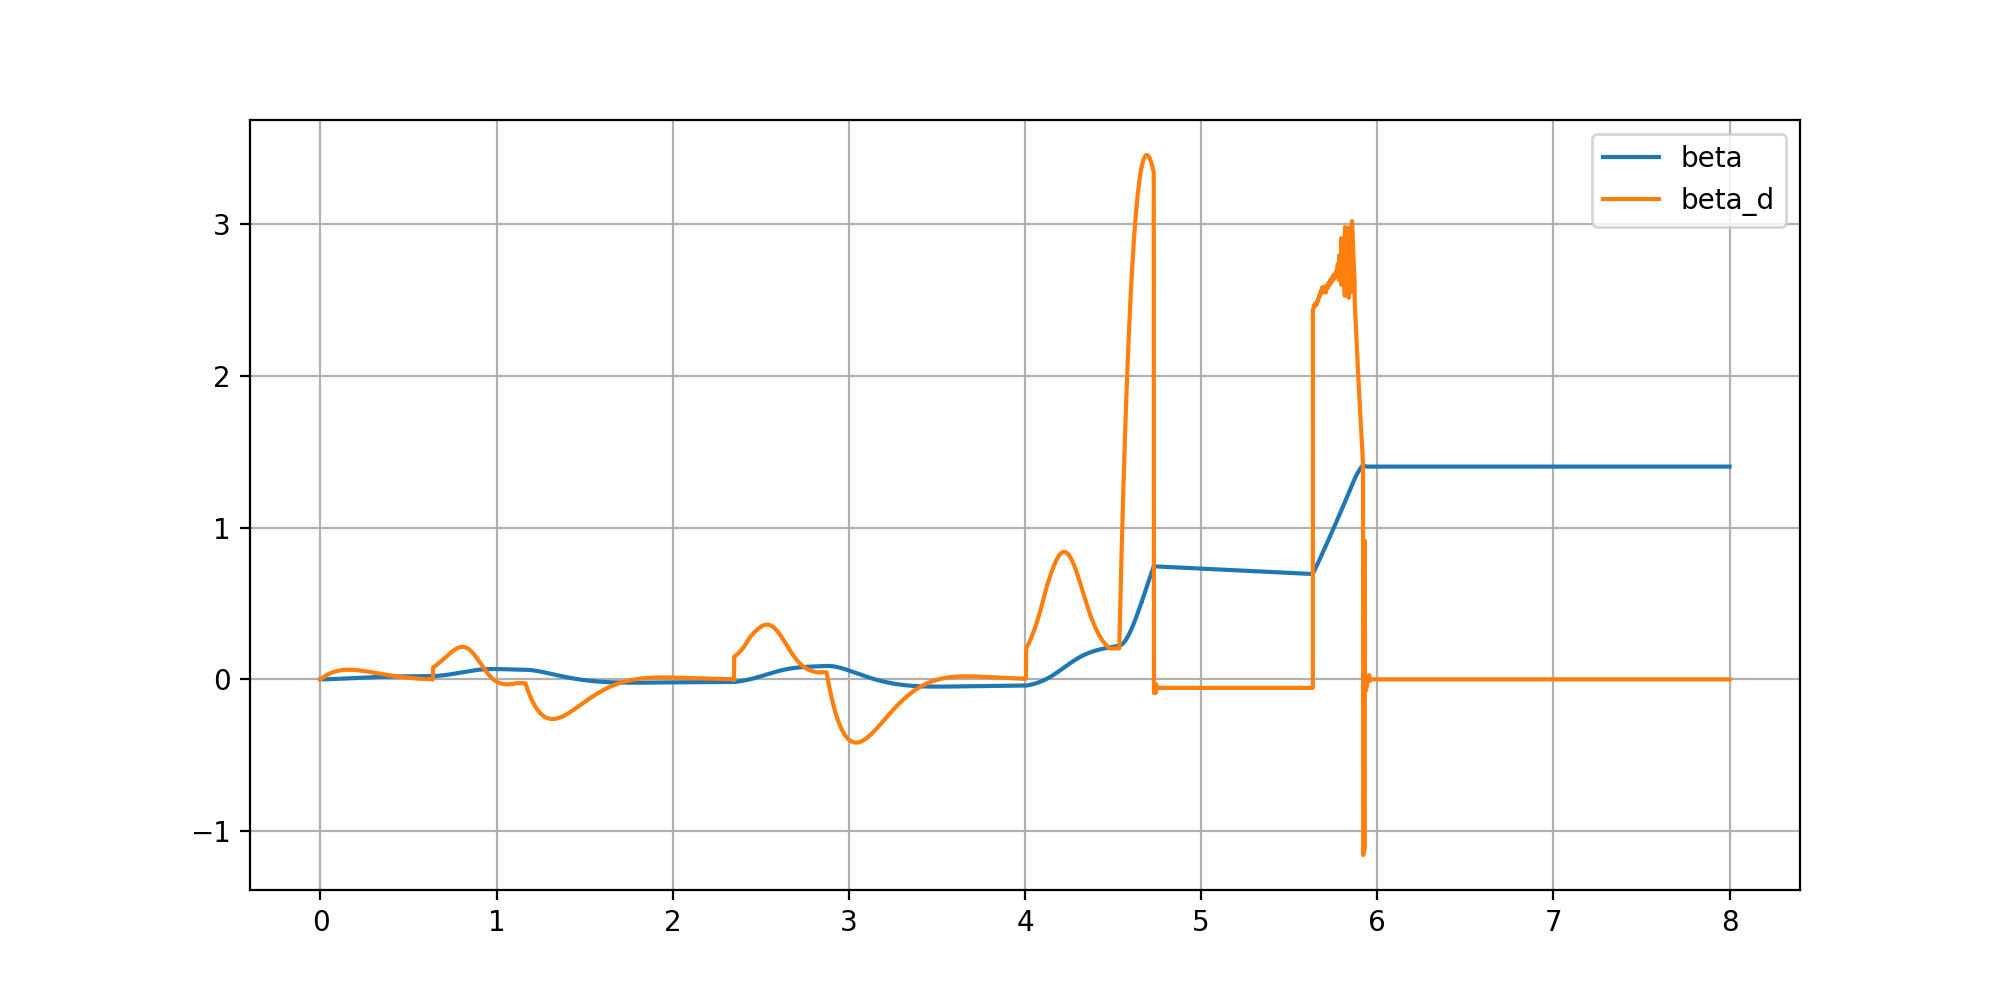

<IPython.core.display.Javascript object>


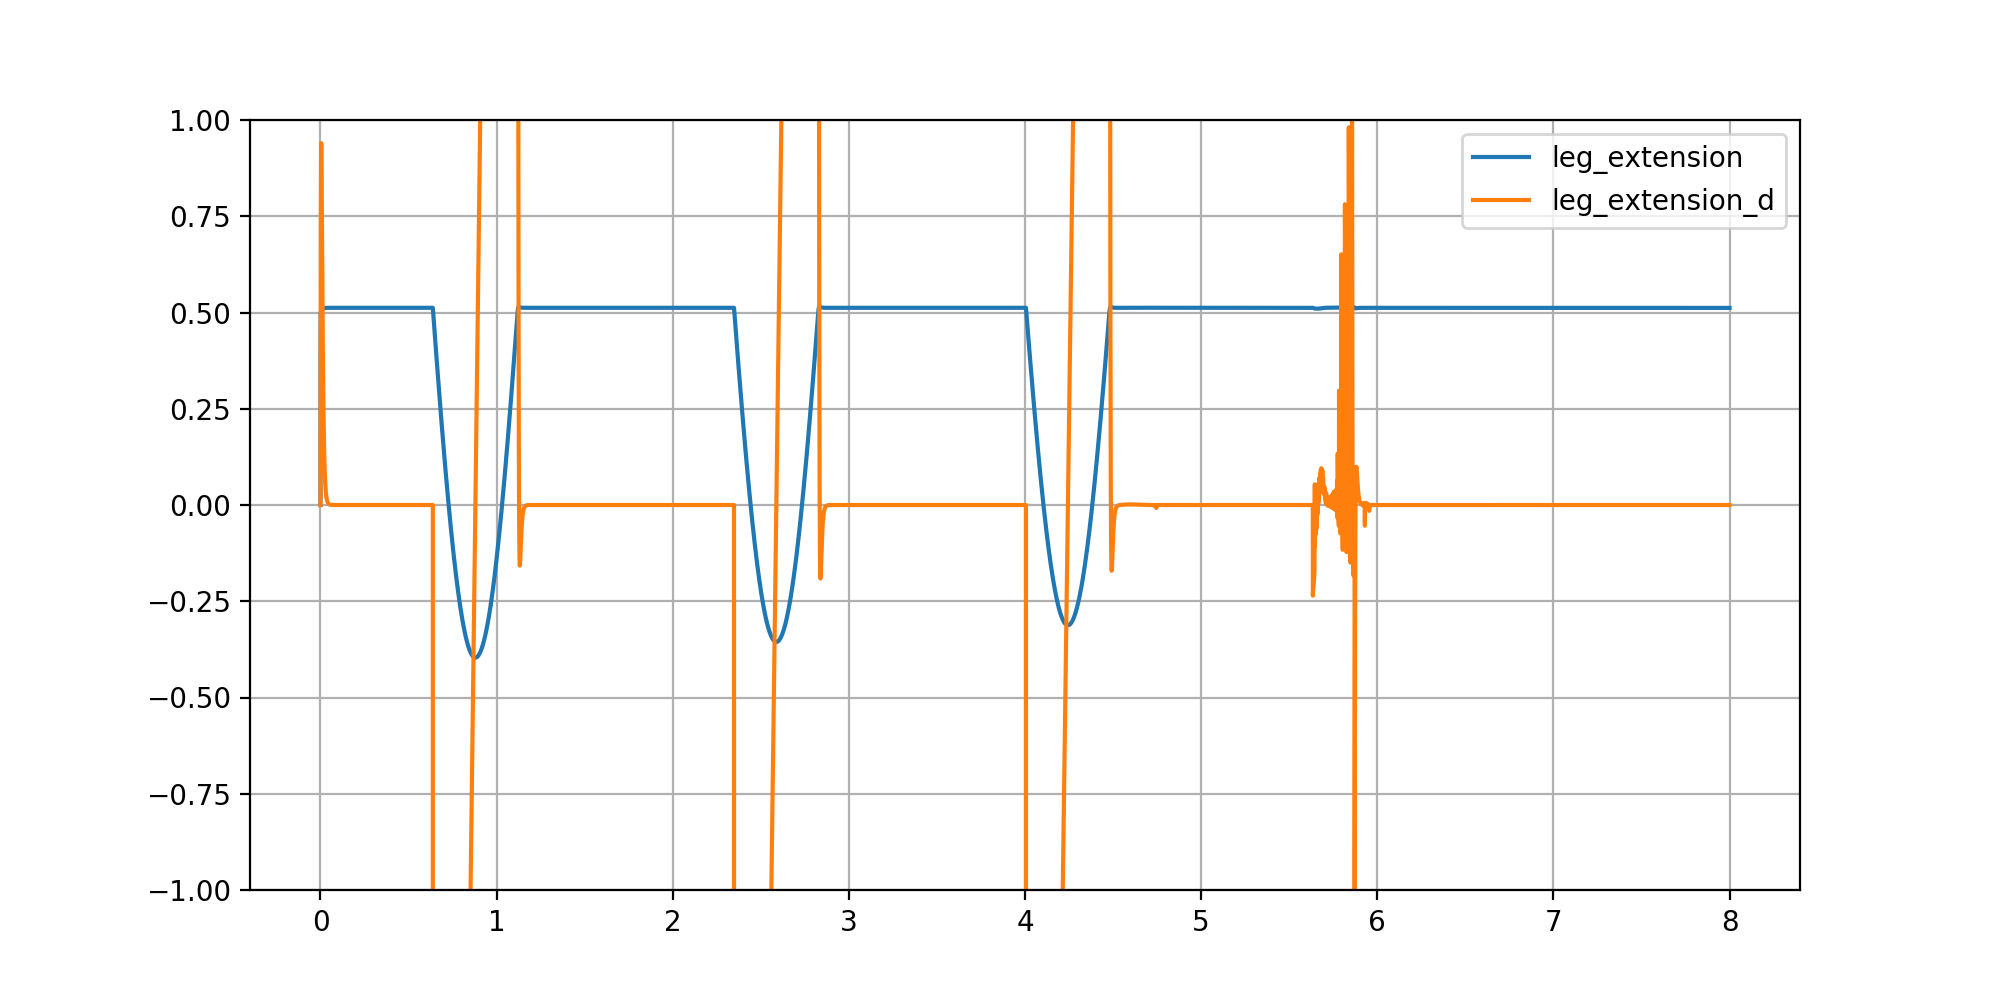

In [36]:
# Plot traces of certain states
plt.figure().set_size_inches(10, 5)
plt.plot(state_log.sample_times(), state_log.data()[0, :])
plt.plot(state_log.sample_times(), state_log.data()[0+5, :])
plt.grid(True)
plt.legend(["body_x", "body_x_d"])

plt.figure().set_size_inches(10, 5)
plt.plot(state_log.sample_times(), state_log.data()[1, :])
plt.plot(state_log.sample_times(), state_log.data()[1+5, :])
plt.grid(True)
plt.legend(["body_z", "body_z_d"])

plt.figure().set_size_inches(10, 5)
plt.plot(state_log.sample_times(), state_log.data()[2, :])
plt.plot(state_log.sample_times(), state_log.data()[2+5, :])
plt.legend(["body_theta", "body_theta_d"])
plt.grid(True)

plt.figure().set_size_inches(10, 5)
plt.plot(state_log.sample_times(), state_log.data()[3, :])
plt.plot(state_log.sample_times(), state_log.data()[3+5, :])
plt.legend(["alpha", "alpha_d"])
plt.grid(True)

plt.figure().set_size_inches(10, 5)
plt.plot(state_log.sample_times(), np.add(state_log.data()[2, :], state_log.data()[3, :]))
plt.plot(state_log.sample_times(), np.add(state_log.data()[2+5, :], state_log.data()[3+5, :]))
plt.legend(["beta", "beta_d"])
plt.grid(True)

plt.figure().set_size_inches(10, 5)
plt.plot(state_log.sample_times(), state_log.data()[4, :])
plt.plot(state_log.sample_times(), state_log.data()[4+5, :])
plt.legend(["leg_extension", "leg_extension_d"])
plt.ylim([-1.0, 1.0])
plt.grid(True)
plt.show()
